# Load Data

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## Data Preparation

In [7]:
# Separate the dependent(y) and independent variables(x)
y = df['logS']
x = df.drop('logS', axis=1)

In [12]:
# check the shape of the data. Rows and columns
df.shape

(1144, 5)

# Data slitting

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building

## Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

# Training the model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

### Applying the model to make predictions

In [61]:
y_model_train_predict = lr_model.predict(x_train)
y_model_test_predict = lr_model.predict(x_test)

### Evaluate model performance

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

lr_model_train_mse = mean_squared_error(y_train, y_model_train_predict)
lr_model_train_r2 = r2_score(y_train, y_model_train_predict)

lr_model_test_mse = mean_squared_error(y_test, y_model_test_predict)
lr_model_test_r2 = r2_score(y_test, y_model_test_predict)

In [63]:
print(f'Model train MSE : {lr_model_train_mse}')
print(f'Model train R2 Score : {lr_model_train_r2}')

print(f'\nModel test MSE : {lr_model_test_mse}')
print(f'Model test R2 Score : {lr_model_test_r2}')

Model train MSE : 1.0139894491573003
Model train R2 Score : 0.7695127746587307

Model test MSE : 0.9990844407075306
Model test R2 Score : 0.7705650058569232


### Create test result table

In [66]:
# Create the DataFrame and transpose it  
data = ['Linear Regression', lr_model_train_mse, lr_model_test_r2, lr_model_test_mse, lr_model_test_r2]  
lr_model_results = pd.DataFrame(data).transpose()  

# Rename the columns after transposition  
lr_model_results.columns = ['Method', 'Train MSE', 'Train R2 Score', 'Test MSE', 'Test R2 Score']  
lr_model_results

,Method,Train MSE,Train R2 Score,Test MSE,Test R2 Score
0,Linear Regression,1.013989,0.770565,0.999084,0.770565


## Random Forest

### Training the model

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=2, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

### Applying the model to make predictions

In [53]:
y_model_train_predict = rf_model.predict(x_train)
y_model_test_predict = rf_model.predict(x_test)

### Evaluate model performance

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

rf_model_train_mse = mean_squared_error(y_train, y_model_train_predict)
rf_model_train_r2 = r2_score(y_train, y_model_train_predict)

rf_model_test_mse = mean_squared_error(y_test, y_model_test_predict)
rf_model_test_r2 = r2_score(y_test, y_model_test_predict)

### Create test result table

In [67]:
# Create the DataFrame and transpose it  
data = ['Random Forest', rf_model_train_mse, rf_model_test_r2, rf_model_test_mse, rf_model_test_r2]  
rf_model_results = pd.DataFrame(data).transpose()  

# Rename the columns after transposition  
rf_model_results.columns = ['Method', 'Train MSE', 'Train R2 Score', 'Test MSE', 'Test R2 Score']  
rf_model_results

,Method,Train MSE,Train R2 Score,Test MSE,Test R2 Score
0,Random Forest,1.050251,0.759562,1.046995,0.759562


## Model Comparison

In [69]:
df_models = pd.concat([lr_model_results, rf_model_results], axis=0)
df_models

,Method,Train MSE,Train R2 Score,Test MSE,Test R2 Score
0,Linear Regression,1.013989,0.770565,0.999084,0.770565
0,Random Forest,1.050251,0.759562,1.046995,0.759562


In [70]:
# Reset indexes
df_models.reset_index(drop=True)

,Method,Train MSE,Train R2 Score,Test MSE,Test R2 Score
0,Linear Regression,1.013989,0.770565,0.999084,0.770565
1,Random Forest,1.050251,0.759562,1.046995,0.759562


# Data Visuzalization of Prediction Results

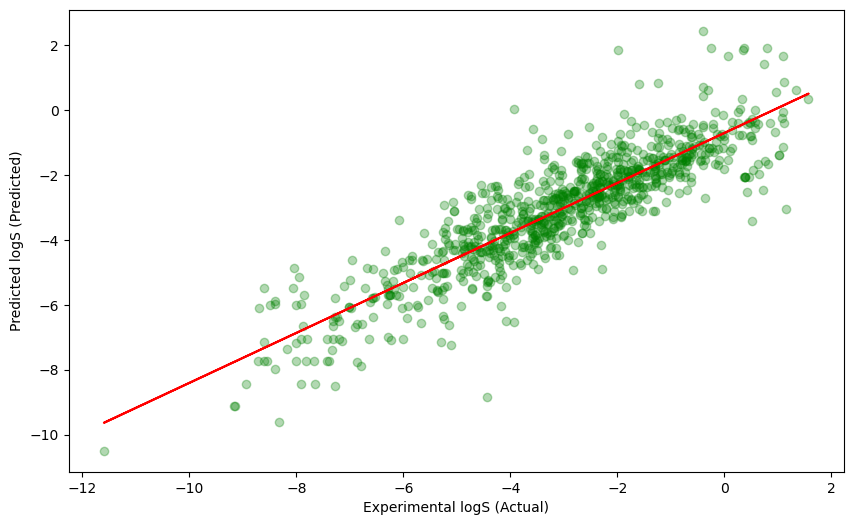

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Fit a polynomial of degree 1 (linear fit)
x = np.polyfit(y_train, y_model_train_predict, 1)
poly = np.poly1d(x)

plt.figure(figsize=(10,6))

# Scatter plot of actual vs predicted
plt.scatter(x=y_train, y=y_model_train_predict, c='g', alpha=0.3)

# Plot the regression line
plt.plot(y_train, p(y_train), 'r')

# Label the axes
plt.xlabel('Experimental logS (Actual)')
plt.ylabel('Predicted logS (Predicted)')

# Show the plot
plt.show()